In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv("C:/Users/Mayo/Documents/base_datos_2008.csv")

In [4]:
df = df.dropna(subset = ["ArrDelay"])
df = df.sample(frac=1).head(100000)
Y = df["ArrDelay"]
X = df[["DepDelay"]]

In [ ]:
df.columns

In [5]:
#Ajusramos el modelo 
regr = linear_model.LinearRegression()
#Ajustamos con X e Y 
regr.fit(X,Y)
#Imprime el valor de las betas 
print("Coeficientes:", regr.coef_)
Y_pred = regr.predict(X)
print("R cuadrado", r2_score(Y, Y_pred))

Coeficientes: [1.01681682]
R cuadrado 0.8726148898579145


InvalidIndexError: (slice(None, None, None), None)

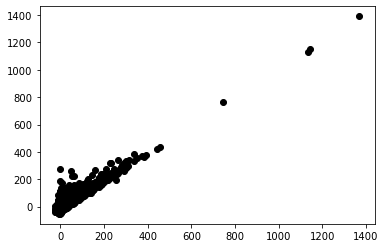

In [10]:
plt.scatter(X[1:10000], Y[1:10000],color = "black")
plt.plot(X[1:10000],Y_pred[1:10000],color="Blue")
plt.show()
#Recta de regresión

In [14]:
#Como se puede ajustar modelos cuando las variables regresoras son categóricas
X = df[["AirTime", "Distance","TaxiIn","TaxiOut"]]

#Las convertimos a String
df["Month"] = df["Month"].apply(str)
df["DayofMonth"] = df["DayofMonth"].apply(str)
df["DayOfWeek"] = df["DayOfWeek"].apply(str)

dummies = pd.get_dummies(data=df[['Month', 'DayofMonth', 'DayOfWeek', 'Origin', 'Dest']])
X = dummies.add(X,fill_value=0)

In [15]:
X.columns

Index(['AirTime', 'DayOfWeek_1', 'DayOfWeek_2', 'DayOfWeek_3', 'DayOfWeek_4',
       'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7', 'DayofMonth_1',
       'DayofMonth_10',
       ...
       'Origin_VLD', 'Origin_VPS', 'Origin_WRG', 'Origin_WYS', 'Origin_XNA',
       'Origin_YAK', 'Origin_YKM', 'Origin_YUM', 'TaxiIn', 'TaxiOut'],
      dtype='object', length=653)

In [17]:
regr = linear_model.LinearRegression()
regr.fit(X,Y)

#print("coeficientes:" regr.coef_)
Y_pred = regr.predict(X)
print("R cuadrado:", r2_score(Y, Y_pred))

R cuadrado: 0.17445196987487455


In [19]:
#Añadimos la columna de salida a todas las variables que teniamos 
X = X.add(df[["DepDelay"]], fill_value=0)

In [20]:
regr = linear_model.LinearRegression()
regr.fit(X,Y)

#print("coeficientes:" regr.coef_)
Y_pred = regr.predict(X)
print("R cuadrado:", r2_score(Y, Y_pred))

R cuadrado: 0.9722886059417744
